In [8]:
import bilby
import matplotlib.pyplot as plt
import glob
import numpy as np
import h5py
import pandas as pd
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict
from scipy import stats
from scipy.stats import gaussian_kde
from pesummary.utils.bounded_2d_kde import Bounded_2d_kde
from pesummary.utils.bounded_1d_kde import bounded_1d_kde
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import matplotlib.ticker as ticker
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
matplotlib.rcParams.update({'font.size': 17})
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['legend.fontsize'] = 20
import config
import matplotlib.lines as mlines
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

In [2]:
#remove default legend
def remove_legend():
    if hasattr(fig, "legends"):
        for leg in list(fig.legends):
            try:
                leg.remove()
            except Exception:
                pass
    
    if getattr(fig, "legend_", None) is not None:
        try:
            fig.legend_.remove()
        except Exception:
            pass
    
    if getattr(fig, "_legend", None) is not None:
        try:
            fig._legend.remove()
        except Exception:
            pass
    
    # 2) Remove axis-level legends
    for ax in fig.axes:
        leg = ax.get_legend()
        if leg is not None:
            try:
                leg.remove()
            except Exception:
                # fallback: hide it
                try:
                    leg.set_visible(False)
                except Exception:
                    pass
    
    # 3) Global pyplot fallback (if anything was created on current figure via plt)
    try:
        lg = plt.gca().get_legend()
        if lg is not None:
            lg.remove()
    except Exception:
        pass


In [3]:
#remove default credible interval lines
def remove_vlines():
    n_params = 2  # since you have two parameters: m1, m2
    for i in range(n_params):
        ax = axs[i * (n_params + 1)]
        for line in list(ax.lines):  # make a copy so we can safely remove
            xdata = line.get_xdata()
            # Remove only vertical lines (x constant)
            if len(set(np.round(xdata, 8))) == 1:
                line.remove()


### Import GW231123 samples

In [4]:
result_files_XPHM = config.gw231123_BF_XPHM
result_files_NRSUR = config.gw231123_BF_NRSUR
result_files_Xo4a = config.gw231123_BF_XO4a
result_file_SEOB = config.gw231123_BF_SEOB
result_file_TPHM = config.gw231123_BF_TPHM

In [5]:
data_all = MultiAnalysisSamplesDict.from_files({
    "XPHM": result_files_XPHM,
    "NRSur": result_files_NRSUR,
    "XO4a": result_files_Xo4a,
    "SEOBNR": result_file_SEOB,
    "TPHM": result_file_TPHM,
 
    })

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


21:32 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
21:32 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2026-01-13  21:32:48 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-01-13  21:32:48 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind that this does introduce a small error.
2026-01-13  21:33:09 PESummary INFO    : Averaging the final spin from the following fits: function bbh_final_spin_precessing_projected_UIB2016 at 0x7f9eb203f400, function bbh_final_spin_precessing_projected_Healyetal at 0x7f9eb203da20, function bbh_final_spin_precessing_HBR2016 at 0x7f9eb203f5b0
2026-0

bbh_final_spin_precessing_HBR2016(): The argument of the square root is negative for indexes [15094]; truncating it to zero.


2026-01-13  21:33:56 PESummary INFO    : Averaging the final mass from the following fits: function bbh_final_mass_non_precessing_UIB2016 at 0x7f9eb203dd80, function bbh_final_mass_non_precessing_Healyetal at 0x7f9e942029e0
21:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
21:33 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2026-01-13  21:34:07 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-01-13  21:34:07 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind that this does introduce a small error.
2026-01-13  21:34:25 PESummary INFO    : Averaging the final spin from the follo

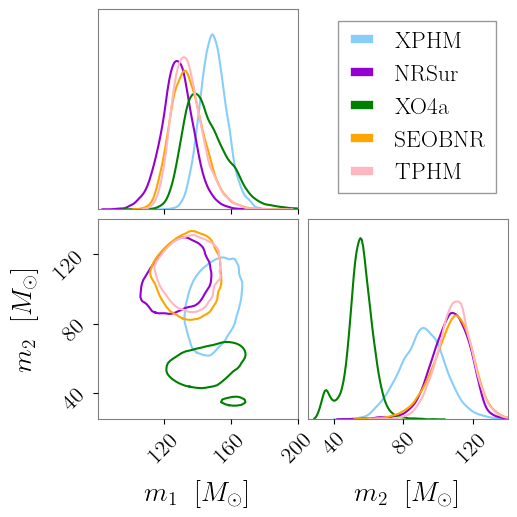

In [9]:
#create figure
fig = data_all.plot(
    parameters=["mass_1_source", "mass_2_source"], type="corner",
    kde=bounded_1d_kde, kde_2d=Bounded_2d_kde,
    levels=[0.9],
    colors=["lightskyblue", "darkviolet","green","orange","lightpink"],   
    plot_contours=True,
    fill_contours=False,
    #quantiles=[10.05,0.95],
    plot_datapoints=False,
    corner_kwargs = dict(linestyles='dotted')
    )

#fix axes limits
axs = fig.axes
axs[0].set_xlim(80,200) 
axs[0].set_ylim(0,0.058) 
axs[3].set_ylim(0,0.069) 
axs[2].set_xlim(80,200) 
axs[2].set_ylim(25,140) 
axs[3].set_xlim(25,140) 

#set labels
axs[2].set_xlabel(r"$m_1 \ \ \mathrm{[}M_\odot \mathrm{]}$",fontsize=20)
axs[3].set_xlabel(r"$m_2 \ \ \mathrm{[}M_\odot \mathrm{]}$",fontsize=20)
axs[2].set_ylabel(r"$m_2 \ \ \mathrm{[}M_\odot \mathrm{]}$",fontsize=20)

remove_vlines()            
remove_legend()

#create legend
fp = FontProperties(family="STIXGeneral", size=17)          # legend entries
model_handles = [
    mlines.Line2D([], [], color="lightskyblue", linestyle="-",
                  label="XPHM"),
    mlines.Line2D([], [], color="darkviolet", linestyle="-",
                label="NRSur"),
    mlines.Line2D([], [], color="green", linestyle="-",
                  label="XO4a"),
    mlines.Line2D([], [], color="orange", linestyle="-",
                  label="SEOBNR"),
    mlines.Line2D([], [], color="lightpink", linestyle="-",
                  label="TPHM"),
]

# Combine them in one legend
all_handles = model_handles 

axs[1].legend(handles=all_handles, prop=fp, frameon=True, loc="upper right",handlelength=1.2)
axs[0].grid(False)
axs[2].grid(False)
axs[3].grid(False)
    
plt.draw()